In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Clasificacion-Pistas/Imagenes'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Se han truncado las últimas 5000 líneas del flujo de salida.
/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive/02889.jpg
/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive/01985.jpg
/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive/04114.jpg
/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive/04640.jpg
/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive/03886.jpg
/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive/03198.jpg
/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive/02415.jpg
/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive/01037.jpg
/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive/03381.jpg
/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive/01802.jpg
/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive/01945.jpg
/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive/0

In [ ]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

x  = '/content/drive/My Drive/Clasificacion-Pistas/Imagenes'
path = Path(x)
path.ls()

[PosixPath('/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Negativo-Drive'),
 PosixPath('/content/drive/My Drive/Clasificacion-Pistas/Imagenes/Positivo-Drive'),
 PosixPath('/content/drive/My Drive/Clasificacion-Pistas/Imagenes/ResNet')]

In [ ]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

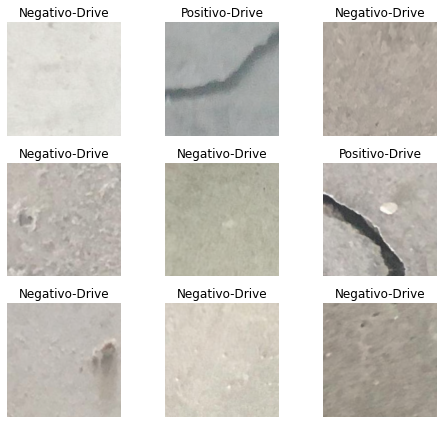

In [ ]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

In [ ]:
data

ImageDataBunch;

Train: LabelList (8000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Negativo-Drive,Negativo-Drive,Negativo-Drive,Negativo-Drive,Negativo-Drive
Path: /content/drive/My Drive/Clasificacion-Pistas/Imagenes;

Valid: LabelList (2000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Negativo-Drive,Negativo-Drive,Positivo-Drive,Positivo-Drive,Negativo-Drive
Path: /content/drive/My Drive/Clasificacion-Pistas/Imagenes;

Test: None

In [ ]:
print(data.classes)
len(data.classes),data.c

['Negativo-Drive', 'Positivo-Drive']


(2, 2)

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy],
                    model_dir = Path('/content/drive/My Drive/Clasificacion-Pistas/Imagenes/ResNet'),
                    path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


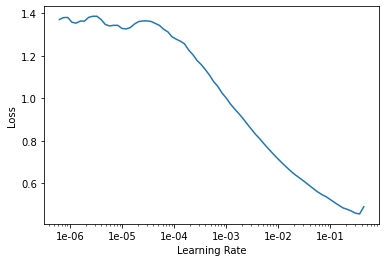

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(3,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.320838,0.110098,0.996000,26:40
1,0.179599,0.113680,0.997500,27:35
2,0.035407,0.048542,0.998000,25:42


Positivo-Drive


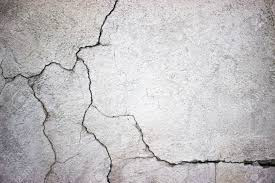

In [ ]:
img = open_image('/content/drive/My Drive/Clasificacion-Pistas/uno.png')
print(learn.predict(img)[0])
img

In [ ]:
#learn.save('/content/drive/My Drive/Clasificacion-Pistas/pesos')

##Guardar

In [ ]:
learn.export()